## Modeling Tutorial

In [1]:
### Import packages
import polars as pl
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools
from collections import Counter

# For plotting
import seaborn as sns

sns.set_theme(style="ticks")
sns.axes_style("darkgrid")
sns.set_theme()

from IPython.display import display, HTML

# For storing DataFrames
import pickle

import sys
from os import getcwd
sys.path.append(getcwd())
import MultiStagePackage.OptMSPfunctions as msp
from MultiStagePackage.models import *

from itertools import islice
import collections
from ast import literal_eval

# For optimization
from pygmo import *

### Model design

The following models below show how you can modify the provided models (the comments with 'ADD' show what was changed):

#### Case 1: More species in all models
- Second product (```P2```)
- Second substrate (```S2```)

In [2]:
### Prepare data

## Models
# Taken from models.py 

def model1(t, y):
    # Measurement-based parameters: 
    mu  = 0.13
    r_S = 16.13
    r_P = 26.11
    r_S2 = 15.00                # ADD new substrates
    r_P2 = 2.0                  # ADD new product 

    # Check for values smaller 0
    for i in range(len(y)):
        if(y[i]<0.0):
            y[i] = 0.0

    if(y[S]>0.001): 
        dXdt =   mu*y[X]
        dSdt = - r_S*y[X]
        dPdt =   r_P*y[X]
        dS2dt =  r_S2*y[X]       # ADD the second substrate to the ODE model
        dP2dt =  r_P2*y[X]       # ADD the second product to the ODE model
    
    # Case in which substrate was all taken up
    else:
        dXdt = 0
        dSdt = 0
        dPdt = 0
        dS2dt = 0               # ADD
        dP2dt = 0               # ADD

    if(dXdt<0.0):
        print(dXdt)
    
    dydt = [dXdt, dSdt, dPdt, dS2dt, dP2dt]     # ADD
    return(dydt)

def model2(t, y):
    # Measurement-based parameters:
    mu  = 0.06
    r_S = 22.86
    r_P = 41.25  
    r_S2 = 30.00                # ADD new substrates
    r_P2 = 10.0                 # ADD new product

    # Check for values smaller 0
    for i in range(len(y)):
        if(y[i]<0.0):
            y[i] = 0.0

    if(y[S]>0.001):
        dXdt =   mu*y[X]
        dSdt = - r_S*y[X]
        dPdt =   r_P*y[X]
        dS2dt = -r_S2*y[X]       # ADD the second substrate to the ODE model
        dP2dt =  r_P2*y[X]       # ADD the second product to the ODE model
    else:
        dXdt = 0
        dSdt = 0
        dPdt = 0
        dS2dt = 0               # ADD
        dP2dt = 0               # ADD
    if(dXdt<0.0):
        print(dXdt)
    
    dydt = [dXdt, dSdt, dPdt, dS2dt,dP2dt]      # ADD
    return(dydt)


models = [model1, model2]

## initial conditions
X_0 = 0.1    # gDW/L
S_0 = 100.0  # mmol/L 
P_0 = 0.0    # mmol/L

S2_0 = 500                      # ADD 
P2_0 = 700                      # ADD

s = np.array([X_0, S_0, P_0, S2_0, P2_0])       # ADD

## Indexing
X, S, P, S2, P2 = (i for i in range(len(s)))    # ADD

#### Case 2: More species but not in all models
- Second product (```P2```)
- Second substrate (```S2```)
- Oxygen **only** in the second model (```O_2```) 

In [3]:
### Prepare data

## Models
# Taken from models.py 

def model1(t, y):
    # Measurement-based parameters: 
    mu  = 0.13
    r_S = 16.13
    r_P = 26.11
    r_S2 = 15.00                # ADD new substrates reaction coefficient
    r_P2 = 2.0                  # ADD new product reaction coefficient
    r_O_2 = 0.0                 # ADD oxygen reaction coefficient

    # Check for values smaller 0
    for i in range(len(y)):
        if(y[i]<0.0):
            y[i] = 0.0

    if(y[S]>0.001): 
        dXdt =   mu*y[X]
        dSdt = - r_S*y[X]
        dPdt =   r_P*y[X]
        dS2dt = - r_S2*y[X]       # ADD the second substrate to the ODE model
        dP2dt =  r_P2*y[X]        # ADD the second product to the ODE model
        dO_2dt = r_O_2*y[X]       # ADD oxygen to the ODE model
    
    # Case in which substrate was all taken up
    else:
        dXdt = 0
        dSdt = 0
        dPdt = 0
        dS2dt = 0               # ADD 
        dP2dt = 0               # ADD 
        dO_2dt = 0             # ADD 

    if(dXdt<0.0):
        print(dXdt)
    
    dydt = [dXdt, dSdt, dPdt, dS2dt, dP2dt, dO_2dt]     # ADD
    return(dydt)

def model2(t, y):
    # Measurement-based parameters:
    mu  = 0.06
    r_S = 22.86
    r_P = 41.25  
    r_S2 = 30.00                # ADD new substrates reaction coefficient
    r_P2 = 10.0                 # ADD new product reaction coefficient
    r_O_2 = 2.0                 # ADD oxygen reaction coefficient 

    # Check for values smaller 0
    for i in range(len(y)):
        if(y[i]<0.0):
            y[i] = 0.0

    if(y[S]>0.001):
        dXdt =   mu*y[X]
        dSdt = - r_S*y[X]
        dPdt =   r_P*y[X]
        dS2dt = -r_S2*y[X]       # ADD the species in ODE model
        dP2dt =  r_P2*y[X]       # ADD the species in ODE model
        dO_2dt = r_O_2*y[X]      # ADD oxygen to the ODE model

    else:
        dXdt = 0
        dSdt = 0
        dPdt = 0
        dS2dt = 0               # ADD
        dP2dt = 0               # ADD
        dO_2dt = 0             # ADD
    if(dXdt<0.0):
        print(dXdt)
    
    dydt = [dXdt, dSdt, dPdt, dS2dt,dP2dt,dO_2dt]      # ADD
    return(dydt)


models = [model1, model2]

## initial conditions
X_0 = 0.1    # gDW/L
S_0 = 100.0  # mmol/L 
P_0 = 0.0    # mmol/L

S2_0 = 500                      # ADD 
P2_0 = 700                      # ADD
O_2_0 = 0.0                     # ADD

s = np.array([X_0, S_0, P_0, S2_0, P2_0, O_2_0])     # ADD

## Indexing
X, S, P, S2, P2, O_2 = (i for i in range(len(s)))    # ADD

### Test integration

In [4]:
%%time
times = [0, 1]  # Input time points
combi = [0, 1]   # Models
s = np.array([X_0, S_0, P_0, S2_0, P2_0, O_2_0])

# Test model1
result_num = sp.integrate.solve_ivp(models[int(combi[0])],t_span=[times[0], times[1]],y0=s,t_eval=[times[1]],dense_output=True,max_step=0.01,).y.T
print(result_num[0])

# Test model2
result_num = sp.integrate.solve_ivp(models[int(combi[1])],t_span=[times[0], times[1]],y0=s,t_eval=[times[1]],dense_output=True,max_step=0.01,).y.T
print(result_num[0])

[1.13882838e-01 9.82774601e+01 2.78831468e+00 4.98398134e+02
 7.00213582e+02 0.00000000e+00]
[1.06183655e-01 9.76440276e+01 4.25126257e+00 4.96908173e+02
 7.01030609e+02 2.06121822e-01]
CPU times: user 11.5 ms, sys: 3.15 ms, total: 14.6 ms
Wall time: 14.1 ms


### Test BruteForce

In [5]:
## Example: analytical-based 2-Stage with all time switch combinations possible between 0 and 24 with a minimal duration of 2 hour for each stage
t_start = 0
t_end = 24
min_duration = 5
n_stages = 2
combis = list(
    itertools.product([0, 1], [0, 1])
)  

MSP_2Stage = msp.do_brute_force_num(combis, models, n_stages, t_start, t_end, min_duration, s)
display(MSP_2Stage.sort_values(["Vol_P"], ascending=[False]).dropna(axis=0).drop_duplicates(subset="Models", keep="first")[:5])

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
19,20,"(0.0, 11.0, 24.0)","[1, 2]",16.37,0.58,0.0,173.12,2,10.574,1.73,1.73
1,2,"(0.0, 6.0, 24.0)","[1, 1]",16.95,0.91,0.0,161.87,2,9.549,1.62,1.62
26,27,"(0.0, 5.0, 24.0)","[2, 1]",19.00,0.83,0.0,164.35,2,8.648,1.64,1.64
49,50,"(0.0, 13.0, 24.0)","[2, 2]",21.46,0.36,0.0,180.44,2,8.407,1.80,1.80


### Test Optimizer

In [6]:
def objective(self, x):
    combi=list(x[(self.max_stage-1):len(x)])
    models=self.models
    s0=self.y
    times=[self.tstart]+list(x[0:(self.max_stage-1)])+[self.tend]
    finished=0
    res=[]
    step=self.step
    while len(times)>1:
        finished= finished+1
        r = sp.integrate.solve_ivp(models[int(combi[0])], t_span=[times[0], times[1]], y0=s0, t_eval=[times[1]], events=[msp.event_sub0, msp.event_prod85percent], dense_output=True, max_step=step)

        try:    # Case in which event triggers and fermentation stopps before tend
            res = [ r.y_events[0][0][species] for species in range(len(s)) ]
            res = res + [r.t_events[0][0]]
        except: # Case in which fermentation runs until tend
            res = [ r.y[species][0] for species in range(len(s)) ]
            res = res + [r.t[0]]
        ## Drop the first element from combination and time
        # e.g.          (0,1,2) and (0.0, 2.0, 3.0, 24.0)
        # will become   (  1,2) and (     2.0, 3.0, 24.0)
        combi.pop(0)
        times.pop(0)

        if((times[0]-res[-1]) < 1e-9):       # next stage 
            if(len(times)==1):              # if t_end is reached -> stop
                res=res+[np.Inf]
                break
            s0=res[:-1]
        else:                               # fermentation finished before last stage        
            res=res+[finished]
            break

    
    ## Objective
    # max. Vol. Productivity
    score = -res[P]/(res[(len(res)-2)]-self.tstart)       
    # max. Titer
    #score = -res[P]
    # max. Yield 
    #score = -res[P]/(self.y[S]-res[S])


    ## Extra constraint (extracon)
    #con= res[P]/(self.y[S]-res[S])  # Yield
    #con2= res[P]                   # Titer
    #con3=res[S]                    # Substrate

    return score #,con    #,con2,con3

## 2.) Define the algorithm that will be used (in our case IHS) with the number of generations (fitness function evaluations) and a seed for reproducibility
# Note: per default there are always 10 evaluations so the total number of fitness function evaluations is 10 + the number of you pass to the gen attribute
algo_ihs = algorithm(
    ihs(gen=100, seed=12345)
)  # total numer of evaluations = 10 + 1000
algo_ihs.set_verbosity(50)  # output best performing each 50th generation

## 3.) Define optimization problem
# Defining the problem through creating a msp.Optimizer object
problem_sim_volP = problem(
    decorator_problem(
        msp.Optimizer(
            s=s,
            models=models,
            tstart=0,
            tend=24,
            max_stage=2,
            min_duration=5,
            objective=objective
        ),
        fitness_decorator=msp.f_log_decor,
    )
)
# Define a relative tolerance that 
problem_sim_volP.c_tol = 1e-3

## 4.) Starting the optimization
res_opt = algo_ihs.evolve(
    population(problem_sim_volP, size=10, seed=12345)
)  # start with 10 candidate solutions


Fevals:          ppar:            bw:            dx:            df:      Violated:    Viol. Norm:        ideal1:
      1         0.3564       0.891251        13.9362        1.99088              0              0       -9.90119
     51         0.6764     0.00281838        6.34645       0.764355              0              0       -10.5644


In [7]:
best_res_opt = msp.do_opt_to_df(pd.DataFrame(res_opt.problem.extract(decorator_problem).dv_log)[1:], n_best=5)
df=msp.do_convert(best_res_opt, models, 0, 24, s)

In [8]:
log = pd.DataFrame(res_opt.problem.extract(decorator_problem).dv_log)[1:]
best_res_opt = msp.do_opt_to_df(log, n_best=5)
best_res_opt_pd = msp.do_convert(best_res_opt, models, 0, 24, s)
best_res_opt_pd

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
0,1,"[0.0, 11.47, 24.0]","[1, 2]",16.33,0.59,0.0,172.52,2,10.56,1.73,1.73
1,2,"[0.0, 11.42, 24.0]","[1, 1]",16.95,0.91,0.0,161.87,2,9.55,1.62,1.62
2,3,"[0.0, 5.07, 24.0]","[2, 1]",19.03,0.83,0.0,164.39,2,8.64,1.64,1.64
3,4,"[0.0, 5.43, 24.0]","[2, 2]",21.46,0.36,0.0,180.45,2,8.41,1.80,1.80


IndexError: index 3 is out of bounds for axis 0 with size 3

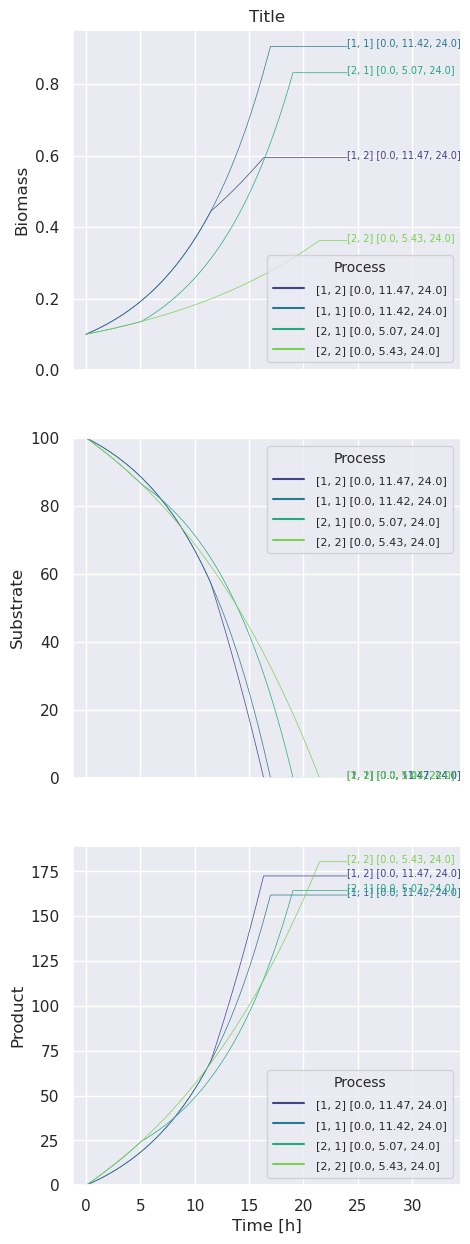

In [9]:
msp.do_custom_plot(best_res_opt_pd, models_num=models, s=s, title="Title")